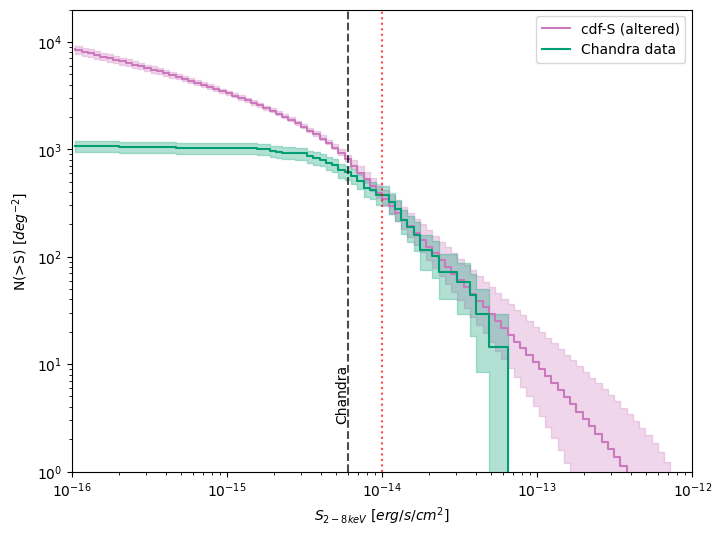

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

cblind = ['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']
def Lehmer(S):
    fb = 6.4e-15
    fb_hi = 7.4e-15
    fb_lo = 5.4e-15
    Sref = 1e-14 
    K = 573.13 *1e14 *1.7
    K_err = 27.49 *1e14
    beta1 = 1.35
    beta1_err = 0.04
    beta2 = 2.55
    beta2_hi = 2.55+0.17 
    beta2_lo = 2.55-0.18
    alpha = 0.124
    
    if S<=fb:
        y = K* (S/Sref) ** (-beta1) * (S/fb)**alpha
        # poi_y = np.sqrt(y)
        yhi = (K+K_err)* (S/Sref)**(-(beta1+beta1_err)) * (S/fb)**alpha
        ylo = (K-K_err)* (S/Sref)**(-(beta1-beta1_err)) * (S/fb)**alpha
        return y, yhi, ylo
    else:
        y = K*(fb/Sref)**(beta2-beta1)*(S/Sref)**(-beta2)
        # poi_y = np.sqrt(y)
        yhi = (K+K_err)*((fb_hi)/Sref)**((beta2_hi)-(beta1-beta1_err))*(S/Sref)**(-(beta2_lo))
        ylo = (K-K_err)*((fb_lo)/Sref)**((beta2_lo)-(beta1+beta1_err))*(S/Sref)**(-(beta2_hi))
        return y, yhi, ylo
def Lehmer_ori(S):
    fb = 6.4e-15
    fb_hi = 7.4e-15
    fb_lo = 5.4e-15
    Sref = 1e-14 
    K = 573.13 *1e14 
    K_err = 27.49 *1e14
    beta1 = 1.35
    beta1_err = 0.04
    beta2 = 2.55
    beta2_hi = 2.55+0.17 
    beta2_lo = 2.55-0.18
    
    if S<=fb:
        y = K* (S/Sref) ** (-beta1) 
        # poi_y = np.sqrt(y)
        yhi = (K+K_err)* (S/Sref)**(-(beta1+beta1_err)) 
        ylo = (K-K_err)* (S/Sref)**(-(beta1-beta1_err)) 
        return y, yhi, ylo
    else:
        y = K*(fb/Sref)**(beta2-beta1)*(S/Sref)**(-beta2)
        # poi_y = np.sqrt(y)
        yhi = (K+K_err)*((fb_hi)/Sref)**((beta2_hi)-(beta1-beta1_err))*(S/Sref)**(-(beta2_lo))
        ylo = (K-K_err)*((fb_lo)/Sref)**((beta2_lo)-(beta1+beta1_err))*(S/Sref)**(-(beta2_hi))
        return y, yhi, ylo

def fil_nan(arr):
    y = []
    for ele in arr:
        ele = ele.replace(" ","")
        if ele=='NaN':
            ele = 0
        y.append(float(ele))
    y = np.array(y)
    return y       

fig, ax = plt.subplots(1,1, figsize = (8,6))
## lehmer origin curve
S_arr = np.logspace(-16, -12, 100)
S_center = (S_arr[1::] + S_arr[0:-1])/2
dS_arr = np.diff(S_arr)

f, fhi, flo = np.zeros(S_center.shape), np.zeros(S_center.shape), np.zeros(S_center.shape)
y, yhi, ylo = np.zeros(S_center.shape), np.zeros(S_center.shape), np.zeros(S_center.shape)
for i, S in enumerate(S_center):
    f[i], __, __ = Lehmer_ori(S) 
    __, fhi[i], __ = Lehmer_ori(S_arr[i+1])
    __, __, flo[i] = Lehmer_ori(S_arr[i])
for i, S in enumerate(S_center):
    y[i] = np.sum(f[i::]* dS_arr[i::])
    ylo[i] = np.sum(flo[i::]* (dS_arr[i::]))
    yhi[i] = np.sum(fhi[i::]* (dS_arr[i::]))
# ax.step(S_center, y, label = 'cdf-S (Lehmer 2012)', color = cblind[0])
# ax.fill_between(S_center, ylo - np.sqrt(ylo), yhi+np.sqrt(yhi), step='pre',alpha = 0.3, color = cblind[0])
## altered lehmer curve
S_arr = np.logspace(-16, -12, 100)
S_center = (S_arr[1::] + S_arr[0:-1])/2
dS_arr = np.diff(S_arr)

f, fhi, flo = np.zeros(S_center.shape), np.zeros(S_center.shape), np.zeros(S_center.shape)
y, yhi, ylo = np.zeros(S_center.shape), np.zeros(S_center.shape), np.zeros(S_center.shape)
for i, S in enumerate(S_center):
    f[i], __, __ = Lehmer(S) 
    __, fhi[i], __ = Lehmer(S_arr[i+1])
    __, __, flo[i] = Lehmer(S_arr[i])
for i, S in enumerate(S_center):
    y[i] = np.sum(f[i::]* dS_arr[i::])
    ylo[i] = np.sum(flo[i::]* (dS_arr[i::]))
    yhi[i] = np.sum(fhi[i::]* (dS_arr[i::]))
ax.step(S_center, y, label = 'cdf-S (altered)', color = cblind[4])
ax.fill_between(S_center, ylo - np.sqrt(ylo), yhi+np.sqrt(yhi), step='pre',alpha = 0.3, color = cblind[4])

# # assume powidx 1.4, nH 1.62e20 cm-2, 2-7 -> 2-8 keV energy conversion factor = 1.158
# # plot xmm pointsrc from catalog 2-12keV
# workpath = '/Users/eusracenorth/Documents/suzaku_A222-223/xissim_test/v1223sgr/xmm_cat'
# # workpath = '../catalog'
# data = pd.read_csv(f'{workpath}/NXSA-Results-1674083268512.csv')
# # for no Galactic abs
# # idx = (np.array(data["EPIC_XMM_STACK_CAT.EP_5_FLUX"] ) + np.array(data["EPIC_XMM_STACK_CAT.EP_4_FLUX"] ))/( np.array(data["EPIC_XMM_STACK_CAT.EP_2_FLUX"]) + np.array(data["EPIC_XMM_STACK_CAT.EP_3_FLUX"]))
# trans = []
# thres = 1e-13
# f = (np.array(data["EPIC_XMM_STACK_CAT.EP_5_FLUX"] ) + np.array(data["EPIC_XMM_STACK_CAT.EP_4_FLUX"] ) )
# # flux_err = (np.array(data["EPIC_XMM_STACK_CAT.EP_5_FLUX_ERR"] ) **2+ np.array(data["EPIC_XMM_STACK_CAT.EP_4_FLUX_ERR"] ) **2)**0.5
# for flux in f:
#     if flux<1e-14:
#         # trans.append(0.6/0.86) # for index 1
#         trans.append(1.158)
#     elif (flux>1e-14) & (flux<thres):
#         trans.append(1.158) # for index 1.4
#     else:
#         # trans.append(0.6/1.23) # for index 1.8
#         trans.append(1.158)
#         # trans.append(0.6)

# f = f*np.array(trans)
# # fhi = f+flux_err*np.array(trans)
# # flo = f-flux_err*np.array(trans)
# y, yerr = [],[]
# for bin1 in S_center:
#     y.append(np.sum(f>bin1))
#     yerr.append(np.sqrt(np.sum(f>bin1)))
# y = np.array(y)/((16.6**2)*3.14/3600); yerr = np.array(yerr)/((16.6**2)*3.14/3600)
# # ax.step(S_center, y, color = cblind[1], label = 'XMM-Newton data')
# # ax.fill_between(S_center, y-yerr, y+yerr, color = cblind[1], step='pre',alpha = 0.3, )
# plot chandra cxc pointsrc from srcflux
workpath = '/Users/eusracenorth/Documents/suzaku_A222-223/chandra/data/wavdetect'
file = open(f'{workpath}/srcflux_summary_idx14.txt')
# 0.5-7keV to 2-8keV
flux = []
dat = file.readlines()
file.close()
f, flo, fhi = [],[],[]
cts = 0
for line in dat:
    if 'Unabs Mod.Flux ' in line:
        string = line.split('Flux ')[-1].split('erg')[0].replace(" ","")
        errstr = line.split('(')[-1]
        flo.append(float(errstr.split(',')[0]))
        fhi.append(float(errstr.split(',')[-1].split(')')[0]))
        if 'E' in string:
            f.append(float(string))
        else:
            f.append(np.nan)

flo = np.array(flo)
fhi = np.array(fhi)
f = np.array(f)
flo[~np.isfinite(flo)] = 0
fhi[~np.isfinite(fhi)] = 0
f[~np.isfinite(f)] = 0
# mask_list = [93, 5, 6, 34, 14, 1, 96, 84, 64]
mask_list = np.array([64,71,82,95,5,93,89,90])-1
fhi[mask_list] = 0; flo[mask_list] = 0; f[mask_list] = 0

y, yerr = [],[]
for bin1 in S_center:
    y.append(np.sum(f>bin1))
    yerr.append(np.sqrt(np.sum(f>bin1)))
y = np.array(y)/(((16.6**2)-3**2*3.14)/3600); yerr = np.array(yerr)/(((16.6**2)-3**2*3.14)/3600)

ax.step(S_center, y, color = cblind[2], label = 'Chandra data')
ax.fill_between(S_center, y-yerr, (y+yerr), color = cblind[2], step='pre',alpha = 0.3, )

# ax.grid(which='both')
ax.set_xlabel('$S_{2-8keV}$ [$erg/s/cm^2$]')
ax.set_ylabel('N(>S) [$deg^{-2}$]')
# ax.set_title(f"logN_vs_logS")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1e-16, 1e-12)
ax.set_ylim(1,2e4)
ax.legend()
ax.axvline(x = 6e-15, color = 'k', linestyle = 'dashed', alpha = 0.7)
ax.text(5e-15, 3, 'Chandra',rotation=90 )
# ax.axvline(x = 3E-15, color = 'k', linestyle = 'dashed', alpha = 0.7)
# ax.text(2e-15, 3, 'XMM-Newton',rotation=90)
ax.axvline(x = 1*1e-14, color = 'r', linestyle = 'dotted', alpha = 0.7)
# ax.axvline(x = 0.7*1e-14, color = 'b', linestyle = 'dashed', alpha = 0.7)
# ax.text(0.8e-14, 3, 'XMM-Newton',color = 'b',rotation=90)
plt.savefig('./pdf/fig1_logN-S.pdf', dpi=300)


calculate the sum flux

In [ ]:
detection_limit = 6e-15

const = 3.4e-12
const_lo = (3.4-1.7)*1e-12
const_hi = (3.4+1.7)*1e-12
Scov = 1.4e-16
bins = np.logspace(np.log10(Scov), np.log10(detection_limit), num=10000)
Sarr = bins[1::]#(bins[0:-1] + bins[1::])/2
Sdiff = np.diff(bins)
f,fhi,flo = [],[],[]
for i in range(len(Sarr)):
    y,yhi,ylo = Lehmer(Sarr[i])
    f.append(Sarr[i]*y*Sdiff[i])
    fhi.append(Sarr[i]*yhi*Sdiff[i])
    flo.append(Sarr[i]*ylo*Sdiff[i])

f = np.array(f)
fhi = np.array(fhi)
flo = np.array(flo)
area = 1#400*3.14/3600 #
print((f.sum()+const)*area,(fhi.sum()+const_hi)*area,(flo.sum()-const_lo)*area)
# convert to suzaku norm
scale = 1/3600*400*3.14/5.166e-9
print((f.sum()+const)*scale,(fhi.sum()+const_hi)*scale,(flo.sum()-const_lo)*scale)
# cosmic variance 0.29 for 12.58 arcmin2


get flux upper and lower limit considering their cosmic variance based on their regions

test rui results

[67, 68, 69, 26, 27, 28, 3, 4, 5, 29, 30, 31, 35, 36, 37]


Text(8e-15, 3, 'XMM-Newton')

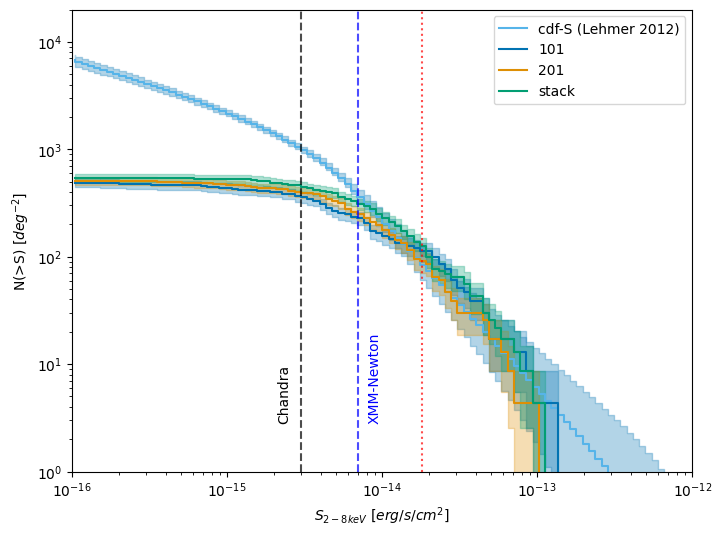

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

cblind = ['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']
def Lehmer(S):
    fb = 6.4e-15
    fb_hi = 7.4e-15
    fb_lo = 5.4e-15
    Sref = 1e-14 
    K = 573.13 *1e14 *1.7
    K_err = 27.49 *1e14
    beta1 = 1.35
    beta1_err = 0.04
    beta2 = 2.55
    beta2_hi = 2.55+0.17 
    beta2_lo = 2.55-0.18
    alpha = 0.124
    
    if S<=fb:
        y = K* (S/Sref) ** (-beta1) * (S/fb)**alpha
        # poi_y = np.sqrt(y)
        yhi = (K+K_err)* (S/Sref)**(-(beta1+beta1_err)) * (S/fb)**alpha
        ylo = (K-K_err)* (S/Sref)**(-(beta1-beta1_err)) * (S/fb)**alpha
        return y, yhi, ylo
    else:
        y = K*(fb/Sref)**(beta2-beta1)*(S/Sref)**(-beta2)
        # poi_y = np.sqrt(y)
        yhi = (K+K_err)*((fb_hi)/Sref)**((beta2_hi)-(beta1-beta1_err))*(S/Sref)**(-(beta2_lo))
        ylo = (K-K_err)*((fb_lo)/Sref)**((beta2_lo)-(beta1+beta1_err))*(S/Sref)**(-(beta2_hi))
        return y, yhi, ylo
def Lehmer_ori(S):
    fb = 6.4e-15
    fb_hi = 7.4e-15
    fb_lo = 5.4e-15
    Sref = 1e-14 
    K = 573.13 *1e14 
    K_err = 27.49 *1e14
    beta1 = 1.35
    beta1_err = 0.04
    beta2 = 2.55
    beta2_hi = 2.55+0.17 
    beta2_lo = 2.55-0.18
    
    if S<=fb:
        y = K* (S/Sref) ** (-beta1) 
        # poi_y = np.sqrt(y)
        yhi = (K+K_err)* (S/Sref)**(-(beta1+beta1_err)) 
        ylo = (K-K_err)* (S/Sref)**(-(beta1-beta1_err)) 
        return y, yhi, ylo
    else:
        y = K*(fb/Sref)**(beta2-beta1)*(S/Sref)**(-beta2)
        # poi_y = np.sqrt(y)
        yhi = (K+K_err)*((fb_hi)/Sref)**((beta2_hi)-(beta1-beta1_err))*(S/Sref)**(-(beta2_lo))
        ylo = (K-K_err)*((fb_lo)/Sref)**((beta2_lo)-(beta1+beta1_err))*(S/Sref)**(-(beta2_hi))
        return y, yhi, ylo

def fil_nan(arr):
    y = []
    for ele in arr:
        ele = ele.replace(" ","")
        if ele=='NaN':
            ele = 0
        y.append(float(ele))
    y = np.array(y)
    return y       

fig, ax = plt.subplots(1,1, figsize = (8,6))
## lehmer origin curve
S_arr = np.logspace(-16, -12, 100)
S_center = (S_arr[1::] + S_arr[0:-1])/2
dS_arr = np.diff(S_arr)

f, fhi, flo = np.zeros(S_center.shape), np.zeros(S_center.shape), np.zeros(S_center.shape)
y, yhi, ylo = np.zeros(S_center.shape), np.zeros(S_center.shape), np.zeros(S_center.shape)
for i, S in enumerate(S_center):
    f[i], __, __ = Lehmer_ori(S) 
    __, fhi[i], __ = Lehmer_ori(S_arr[i+1])
    __, __, flo[i] = Lehmer_ori(S_arr[i])
for i, S in enumerate(S_center):
    y[i] = np.sum(f[i::]* dS_arr[i::])
    ylo[i] = np.sum(flo[i::]* (dS_arr[i::]))
    yhi[i] = np.sum(fhi[i::]* (dS_arr[i::]))
ax.step(S_center, y, label = 'cdf-S (Lehmer 2012)', color = cblind[-1])
ax.fill_between(S_center, ylo - np.sqrt(ylo), yhi+np.sqrt(yhi), step='pre',alpha = 0.3, color = cblind[0])

## altered lehmer curve
S_arr = np.logspace(-16, -12, 100)
S_center = (S_arr[1::] + S_arr[0:-1])/2
dS_arr = np.diff(S_arr)

f, fhi, flo = np.zeros(S_center.shape), np.zeros(S_center.shape), np.zeros(S_center.shape)
y, yhi, ylo = np.zeros(S_center.shape), np.zeros(S_center.shape), np.zeros(S_center.shape)
for i, S in enumerate(S_center):
    f[i], __, __ = Lehmer(S) 
    __, fhi[i], __ = Lehmer(S_arr[i+1])
    __, __, flo[i] = Lehmer(S_arr[i])
for i, S in enumerate(S_center):
    y[i] = np.sum(f[i::]* dS_arr[i::])
    ylo[i] = np.sum(flo[i::]* (dS_arr[i::]))
    yhi[i] = np.sum(fhi[i::]* (dS_arr[i::]))
# ax.step(S_center, y, label = 'cdf-S (altered)', color = cblind[4])
# ax.fill_between(S_center, ylo - np.sqrt(ylo), yhi+np.sqrt(yhi), step='pre',alpha = 0.3, color = cblind[4])


# plot xmm pointsrc fluxes from rui results 2-12keV-> 2-8keV
workpath = '/Users/eusracenorth/Documents/suzaku_A222-223/xmm_data/rui'
from astropy.io import fits
hdul = fits.open(f'{workpath}/srclist_sum_ex_extend_byeye.fits')
data = hdul[1].data
# for no Galactic abs
# idx = (np.array(data["EPIC_XMM_STACK_CAT.EP_5_FLUX"] ) + np.array(data["EPIC_XMM_STACK_CAT.EP_4_FLUX"] ))/( np.array(data["EPIC_XMM_STACK_CAT.EP_2_FLUX"]) + np.array(data["EPIC_XMM_STACK_CAT.EP_3_FLUX"]))
trans = 1/1.2
# obses = ['0502020101', '0502020201']
# for i, obs in enumerate(['0502020101', '0502020201']):
where_lst = [(data['OBS_ID']=='0502020101'), (data['OBS_ID']=='0502020201'), (data['OBS_ID']!='0502020101') & (data['OBS_ID']!='0502020201')]
labels = ['101', '201', 'stack']
ex_radec = [(24.380,-12.990),(24.394,-12.993),(24.482,-12.820),(24.479,-12.796),(24.509,-12.754)]
where1 =np.arange(len(data['OBS_ID']))
idx1 = []
for pos in ex_radec:
    idx1+=list(where1[(abs(data['RA']-pos[0]) < 0.001) & (abs(data['DEC']-pos[1]) < 0.001)])
print(idx1)
for i, where in enumerate(where_lst):
    where[idx1] = False
    flux = (np.array(data["EP_5_FLUX"][where] ) + np.array(data["EP_4_FLUX"][where] ) )* trans
    f_PN = (np.array(data["PN_5_FLUX"][where] ) + np.array(data["PN_4_FLUX"][where] ) )* trans
    f_MOS1 = (np.array(data["M1_5_FLUX"][where] ) + np.array(data["M1_4_FLUX"][where] ) )*trans
    f_MOS2 = (np.array(data["M2_5_FLUX"][where] ) + np.array(data["M2_4_FLUX"][where] ) )*trans
    f = flux
    y, yerr = [],[]
    for bin1 in S_center:
        
        y.append(np.sum(f>bin1))
        yerr.append(np.sqrt(np.sum(f>bin1)))
    y = np.array(y)/(((16.6**2)*3.14-3**2*3.14)/3600); yerr = np.array(yerr)/(((16.6**2)*3.14-3**2*3.14)/3600)
    ax.step(S_center, y, color = cblind[i], label = f'{labels[i]}')
    ax.fill_between(S_center, y-yerr, y+yerr, color = cblind[i], step='pre',alpha = 0.3, )

# ax.grid(which='both')
ax.set_xlabel('$S_{2-8keV}$ [$erg/s/cm^2$]')
ax.set_ylabel('N(>S) [$deg^{-2}$]')
# ax.set_title(f"logN_vs_logS")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1e-16, 1e-12)
ax.set_ylim(1,2e4)
ax.legend()
ax.axvline(x = 3e-15, color = 'k', linestyle = 'dashed', alpha = 0.7)
ax.text(2.1e-15, 3, 'Chandra',rotation=90 )
# ax.axvline(x = 3E-15, color = 'k', linestyle = 'dashed', alpha = 0.7)
# ax.text(2e-15, 3, 'XMM-Newton',rotation=90)
ax.axvline(x = 1.8*1e-14, color = 'r', linestyle = 'dotted', alpha = 0.7)
ax.axvline(x = 0.7*1e-14, color = 'b', linestyle = 'dashed', alpha = 0.7)
ax.text(0.8e-14, 3, 'XMM-Newton',color = 'b',rotation=90)
# plt.savefig('./pdf/fig1_logN-S.pdf', dpi=300)


try out scaling logN-S for certain region to calculate flux and corresponding cosmic variance 

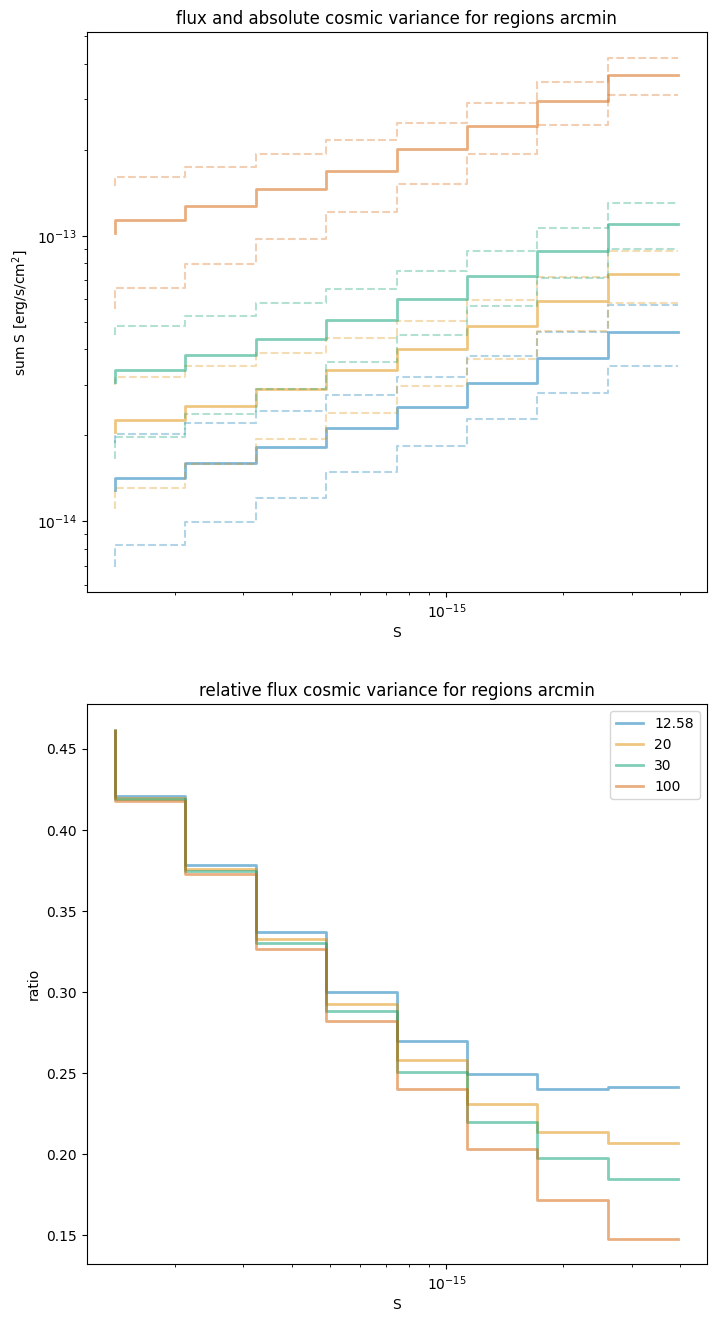

In [5]:
def Lehmer_scaled(S, region):# region is in arcmin
    
    fb = 6.4e-15
    fb_hi = 7.4e-15
    fb_lo = 5.4e-15
    Sref = 1e-14 
    K = 573.13 *1e14 *1.7
    K_err = 27.49 *1e14
    beta1 = 1.35
    beta1_err = 0.04
    beta2 = 2.55
    beta2_hi = 2.55+0.17 
    beta2_lo = 2.55-0.18
    scale = region/3600
    if S<Scov:
        y = 3.4e-12/3600
        ylo = (3.4-1.7)*1e-12
        yhi = (3.4+1.7)*1e-12
    if (S<=fb) & (S>=Scov):
        y = K* (S/Sref) ** (-beta1) 
        # poi_y = np.sqrt(y)
        yhi = (K+K_err)* (S/Sref)**(-(beta1+beta1_err)) 
        ylo = (K-K_err)* (S/Sref)**(-(beta1-beta1_err)) 
        return scale*y, scale*yhi, scale*ylo
    else:
        y = K*(fb/Sref)**(beta2-beta1)*(S/Sref)**(-beta2)
        # poi_y = np.sqrt(y)
        yhi = (K+K_err)*((fb_hi)/Sref)**((beta2_hi)-(beta1-beta1_err))*(S/Sref)**(-(beta2_lo))
        ylo = (K-K_err)*((fb_lo)/Sref)**((beta2_lo)-(beta1+beta1_err))*(S/Sref)**(-(beta2_hi))
    return scale*y, scale*yhi, scale*ylo



detection_limit = 6e-15
areas = [12.58,20,30,100]
Scov = 1.4e-16
bins = np.logspace(np.log10(Scov), np.log10(detection_limit), num=10)

Sarr = (bins[0:-1] + bins[1::])/2
Sdiff = np.diff(bins)

fig,axs = plt.subplots(2,1, figsize = (8,16))

for k, area in enumerate(areas):
    const = 3.4e-12/3600*area
    constlo = (3.4-1.7)*1e-12/3600*area
    consthi = (3.4+1.7)*1e-12/3600*area
    const_err = 1.7e-12/3600*area
    y,yhi,ylo = np.zeros(len(bins)-1),np.zeros(len(bins)-1),np.zeros(len(bins)-1)
    for i in range(len(Sarr)):
        tmp,tmphi, tmplo= Lehmer_scaled(Sarr[i], area) #10arcmin region
        y[i] = tmp
        yhi[i] = tmphi
        ylo[i] = tmplo
    f = np.cumsum(Sarr*y*Sdiff)+const
    fhi = np.cumsum(Sarr*yhi*Sdiff)+consthi
    flo = np.cumsum(Sarr*ylo*Sdiff)+constlo
    ferr = np.sqrt(np.cumsum(Sarr**2*y*Sdiff)+const_err**2)
    fhierr = np.sqrt(np.cumsum(Sarr**2*yhi*Sdiff)+const_err**2)
    floerr = np.sqrt(np.cumsum(Sarr**2*ylo*Sdiff)+const_err**2)


    # area = 1#400*3.14/3600 #
    # print((f.sum()+const)*area,(fhi.sum()+const_hi)*area,(flo.sum()-const_lo)*area)
    
    axs[0].step(bins[0:-1], f, color = cblind[k], label = f'{area}', alpha = 0.5, linewidth =2)
    axs[0].step(bins[0:-1], f+ferr, color = cblind[k],  linestyle = '--',alpha = 0.3, )
    axs[0].step(bins[0:-1], f-ferr, color = cblind[k],  linestyle = '--',alpha = 0.3, )
     
    axs[0].set_title(f'flux and absolute cosmic variance for regions arcmin')
    axs[0].set_ylabel('sum S [$\\rm erg/s/cm^2$]')
    axs[0].set_xlabel('S')
    axs[0].set_xscale('log')
    axs[0].set_yscale('log')

    axs[1].step(bins[0:-1], ferr/f, color = cblind[k], label = f'{area}', alpha = 0.5, linewidth =2)
     
    axs[1].set_title(f'relative flux cosmic variance for regions arcmin')
    axs[1].set_ylabel('ratio')
    axs[1].set_xlabel('S')
    axs[1].set_xscale('log')
    # axs[1].set_yscale('log')
    # axs[1].set_ylim(0,0.2)

plt.legend()

In [ ]:
# convert pixel numbers to region area
areas = {'annu_a222_1_xis0':163, 'annu_a222_2_xis0':1225, 'annu_a222_3_xis0':1712, 
    'annu_a223_1_xis0':108, 'annu_a223_2_xis0':728, 'annu_a223_3_xis0':1234,
    'annu_a222_1_xis1':163, 'annu_a222_2_xis1':1225, 'annu_a222_3_xis1':1599,
    'annu_a223_1_xis1':108, 'annu_a223_2_xis1':735, 'annu_a223_3_xis1':1255,
    'annu_a222_1_xis3':163, 'annu_a222_2_xis3':1225, 'annu_a222_3_xis3':1466,
    'annu_a223_1_xis3':108, 'annu_a223_2_xis3':733, 'annu_a223_3_xis3':1248,
    'filabox':614, 'bkg':440}



In [6]:

# convert to suzaku norm
def suzaku_norm(flux, area):
    return flux/area*400*3.14/5.243e-9

file = open(f'/Users/eusracenorth/Documents/suzaku_A222-223/suzaku_data/spectras/cxb_robust_test/cxb_cosmicvariance.csv', 'w')
file.write('region, pixels, area, flux, flux_err, ratio\n')
detection_limit = 6e-15

'''
230317
regions = ['A222_1','A222_2','A222_3','A222_4a','A222_4b','A222_5a', 'A222_5b', 
    'A223_1','A223_2','A223_3','A223_4b','A223_5a', 'A223_5b', 'bkg', 'werner']
areas = {'A222_1':1*3.14,'A222_2':(2.5**2-1)*3.14,'A222_3':(3.5**2-2.5**2)*3.14,'A222_4a':(5**2-3.5**2)*3.14,
'A222_4b':(5**2-3.5**2)*3.14*65/360,'A222_5a':(7**2-5**2)*3.14*30/360, 'A222_5b':(7**2-5**2)*3.14*30/360, 
'A223_1':1*3.14,'A223_2':(2**2-1)*3.14*300/360,'A223_3':(3**2-2**2)*3.14*300/360,
'A223_4b':(5.5**2-3**2)*3.14*85/360,'A223_5a':(8**2-5.5**2)*3.14*47/360, 'A223_5b':(8**2-5.5**2)*3.14*20/360, 'bkg':2**2*3.14, 'werner': 1.6**2*3.14}
'''


#230406
regions = {'annu_a222_1_xis0':163, 'annu_a222_2_xis0':1225, 'annu_a222_3_xis0':1712, 
    'annu_a223_1_xis0':108, 'annu_a223_2_xis0':728, 'annu_a223_3_xis0':1234,
    'annu_a222_1_xis1':163, 'annu_a222_2_xis1':1225, 'annu_a222_3_xis1':1599,
    'annu_a223_1_xis1':108, 'annu_a223_2_xis1':735, 'annu_a223_3_xis1':1255,
    'annu_a222_1_xis3':163, 'annu_a222_2_xis3':1225, 'annu_a222_3_xis3':1466,
    'annu_a223_1_xis3':108, 'annu_a223_2_xis3':733, 'annu_a223_3_xis3':1248,
    'filabox_xis0':614,'filabox_xis1':614,'filabox_xis3':614,
    'filabox_enlarge_xis0':1034,'filabox_enlarge_xis1':1034,'filabox_enlarge_xis3':1034, 
    'bkg_xis0':440, 'bkg_xis1':440, 'bkg_xis3':440}

for region in regions.keys():
    area = regions[region]*2.316e-3**2*3600 # arcmin2
    Scov = 1.4e-16
    bins = np.logspace(np.log10(Scov), np.log10(detection_limit), num=100)

    Sarr = (bins[0:-1] + bins[1::])/2
    Sdiff = np.diff(bins)


    const = 3.4e-12/3600*area
    constlo = (3.4-1.7)*1e-12/3600*area
    consthi = (3.4+1.7)*1e-12/3600*area
    const_err = 1.7e-12/3600*area
    y,yhi,ylo = np.zeros(len(bins)-1),np.zeros(len(bins)-1),np.zeros(len(bins)-1)
    for i in range(len(Sarr)):
        tmp,tmphi, tmplo= Lehmer_scaled(Sarr[i], area) #10arcmin region
        y[i] = tmp
        yhi[i] = tmphi
        ylo[i] = tmplo
    f = np.cumsum(Sarr*y*Sdiff)+const
    fhi = np.cumsum(Sarr*yhi*Sdiff)+consthi
    flo = np.cumsum(Sarr*ylo*Sdiff)+constlo
    ferr = np.sqrt(np.cumsum(Sarr**2*y*Sdiff)+const_err**2)
    fhierr = np.sqrt(np.cumsum(Sarr**2*yhi*Sdiff)+const_err**2)
    floerr = np.sqrt(np.cumsum(Sarr**2*ylo*Sdiff)+const_err**2)
    maxerr =np.array([ferr[-1], fhierr[-1], floerr[-1]]).max()
    print(region, f[-1],maxerr,suzaku_norm(f[-1], area))
    print(region,suzaku_norm(maxerr, area),suzaku_norm(maxerr, area)/suzaku_norm(f[-1], area)*100)
    file.write(f'{region},{regions[region]},{area:.2f},{f[-1]},{maxerr},{maxerr/f[-1]*100:.2f}%\n')
    # file.write(f'{region}, {areas[region]:.2f}, {f[-1]*1e15:.2f}, {maxerr*1e15:.2f}, {maxerr/f[-1]*100:.2f}%\n')

file.close()


annu_a222_1_xis0 1.1557683391065315e-14 5.104499658804196e-15 0.0008796569933415883
annu_a222_1_xis0 0.0003885042244579935 44.165422135981316
annu_a222_2_xis0 8.68598905156749e-14 1.7435322212058988e-14 0.0008796569933415885
annu_a222_2_xis0 0.00017657290406362944 20.07292676579252
annu_a222_3_xis0 1.213911286227228e-13 2.2229853021805243e-14 0.0008796569933415885
annu_a222_3_xis0 0.00016108793034095125 18.312584514222984
annu_a223_1_xis0 7.657851571994194e-15 4.095136578968982e-15 0.0008796569933415881
annu_a223_1_xis0 0.00047040811597252294 53.47631173664236
annu_a223_2_xis0 5.1619592077886796e-14 1.2270814706565255e-14 0.0008796569933415883
annu_a223_2_xis0 0.0002091087421679374 23.771622774643973
annu_a223_3_xis0 8.749804481334104e-14 1.7525618453351183e-14 0.0008796569933415881
annu_a223_3_xis0 0.00017619288371545597 20.029725796431748
annu_a222_1_xis1 1.1557683391065315e-14 5.104499658804196e-15 0.0008796569933415883
annu_a222_1_xis1 0.0003885042244579935 44.165422135981316
annu_

In [10]:
# summarize ps flux
workpath = '/Users/eusracenorth/Documents/suzaku_A222-223/suzaku_data/spectras/cxb_robust_test'
sum_flux = 9.8002e-13
sum_flux_err = 3.5e-13 # 3.5e-13, 2.7e-13
xissim_sum = {'xis0':1470, 'xis1':1514, 'xis3':1573}

ps_pixs = {'annu_a222_1_xis0':67, 'annu_a222_2_xis0':187, 'annu_a222_3_xis0':199, 
'annu_a223_1_xis0':5, 'annu_a223_2_xis0':70, 'annu_a223_3_xis0':97,
'annu_a222_1_xis1':60, 'annu_a222_2_xis1':259, 'annu_a222_3_xis1':221,
'annu_a223_1_xis1':10, 'annu_a223_2_xis1':76, 'annu_a223_3_xis1':130,
'annu_a222_1_xis3':62, 'annu_a222_2_xis3':198, 'annu_a222_3_xis3':186,
'annu_a223_1_xis3':6, 'annu_a223_2_xis3':68, 'annu_a223_3_xis3':163,
'filabox_xis0':63, 'filabox_xis1':79, 'filabox_xis3':86,
'filabox_enlarge_xis0':74,'filabox_enlarge_xis1':99,'filabox_enlarge_xis3':110, 
'bkg_xis0':26, 'bkg_xis1':21, 'bkg_xis3':18}

newf = open(f'{workpath}/ps_flux.csv', 'w')
newf.write('region, psflux, psflux_err, ratio\n')
for x in [0,1,3]:
    for j in [2,3]:
        for i in [1,2,3]:
            reg = f'annu_a22{j}_{i}_xis{x}'
            f_xi0 = ps_pixs[reg]/xissim_sum[f'xis{x}']*sum_flux
            ferr_xi0 = ps_pixs[reg]/xissim_sum[f'xis{x}']*sum_flux_err
            newf.write(f"{reg},{f_xi0},{ferr_xi0},{f'{(ferr_xi0/f_xi0*100):.2f}%'}\n")
for x in [0,1,3]:
    reg = f'filabox_xis{x}'
    f_xi0 = ps_pixs[reg]/xissim_sum[f'xis{x}']*sum_flux
    ferr_xi0 = ps_pixs[reg]/xissim_sum[f'xis{x}']*sum_flux_err
    newf.write(f"{reg},{f_xi0},{ferr_xi0},{f'{(ferr_xi0/f_xi0*100):.2f}%'}\n")
for x in [0,1,3]:
    reg = f'filabox_enlarge_xis{x}'
    f_xi0 = ps_pixs[reg]/xissim_sum[f'xis{x}']*sum_flux
    ferr_xi0 = ps_pixs[reg]/xissim_sum[f'xis{x}']*sum_flux_err
    newf.write(f"{reg},{f_xi0},{ferr_xi0},{f'{(ferr_xi0/f_xi0*100):.2f}%'}\n")
for x in [0,1,3]:
    reg = f'bkg_xis{x}'
    f_xi0 = ps_pixs[reg]/xissim_sum[f'xis{x}']*sum_flux
    ferr_xi0 = ps_pixs[reg]/xissim_sum[f'xis{x}']*sum_flux_err
    newf.write(f"{reg},{f_xi0},{ferr_xi0},{f'{(ferr_xi0/f_xi0*100):.2f}%'}\n")
    
newf.close()

In [11]:
# sum up cosmic variance and cxb flux

import pandas as pd
import numpy as np
workpath = '/Users/eusracenorth/Documents/suzaku_A222-223/suzaku_data/spectras/cxb_robust_test'

def suzaku_norm(flux, area):
    return flux/area*400*3.14/5.166e-9
cv_data = np.array(pd.read_csv(f'{workpath}/cxb_cosmicvariance.csv'))
ps_data = np.array(pd.read_csv(f'{workpath}/ps_flux.csv'))
sumflux = cv_data[:,3] + ps_data[:,1]
sumerr = (cv_data[:,4]**2 + ps_data[:,2]**2)**0.5

f = open(f'{workpath}/total_cxb_xissim.csv', 'w')
f.write('region,area,cvflux,cvflux_err,cvratio,psflux,psflux_err,psflux_ratio,sumflux,sumflux_err,sumerr_ratio,cvportion,psportion,suzaku_norm,suzaku_norm_err,suzaku_norm_hi,suzaku_norm_lo\n')
for i in range(len(regions)):
    sum_norm = suzaku_norm(sumflux[i], cv_data[:,2][i])
    sum_norm_err = suzaku_norm(sumerr[i], cv_data[:,2][i])
    f.write(f'{cv_data[:,0][i]}, {cv_data[:,2][i]:.2f}, {cv_data[:,3][i]*1e15:.2f}, {cv_data[:,4][i]*1e15:.2f}, {cv_data[:,5][i]}, {ps_data[:,1][i]*1e15:.2f}, {ps_data[:,2][i]*1e15:.2f}, {ps_data[:,3][i]}, {sumflux[i]*1e15:.2f}, {sumerr[i]*1e15:.2f}, {sumerr[i]/sumflux[i]*100:.2f}%, {cv_data[:,3][i]/sumflux[i]*100:.2f}%, {ps_data[:,1][i]/sumflux[i]*100:.2f}%, {sum_norm*1e4:.2f}, {sum_norm_err*1e4:.2f}, {(sum_norm + sum_norm_err)*1e4:.2f}, {(sum_norm - sum_norm_err)*1e4:.2f}\n')
f.write('NOTE: flux *1e-15, norm*1e-4')
f.close()


In [14]:
print(workpath)

/Users/eusracenorth/Documents/suzaku_A222-223/chandra/data/wavdetect


calculate cosmic variance and the cxb flux for every region

In [6]:
import numpy as np
# convert to suzaku norm
def suzaku_norm(flux, area):
    return flux/area*400*3.14/5.166e-9

file = open(f'/Users/eusracenorth/Documents/suzaku_A222-223/suzaku_data/spectras/spectras_230317/cxb_cosmicvariance.csv', 'w')
file.write('region, area, flux, flux_err, ratio\n')
detection_limit = 6e-15
regions = ['A222_1','A222_2','A222_3', 
    'A223_1','A223_2','A223_3','fila', 'bkg']
areas = {'A222_1':4*3.14,'A222_2':(4**2-4)*3.14,'A222_3':(5.5**2-4**2)*3.14*3/4-3.5*4.5/2, 
'A223_1':(4-0.9**2*2)*3.14,'A223_2':(4**2-2**2)*3.14*3/4-0.9**2*2*3.14,'A223_3':(6**2-4**2)*3.14*150/360-0.9**2*6*3.14,
'fila': 4.5*3.5, 'bkg':2**2*3.14}
for region in regions:
    area = areas[region] # arcmin2
    Scov = 1.4e-16
    bins = np.logspace(np.log10(Scov), np.log10(detection_limit), num=100)
    Sarr = (bins[0:-1] + bins[1::])/2
    Sdiff = np.diff(bins)
    const = 3.4e-12/3600*area
    constlo = (3.4-1.7)*1e-12/3600*area
    consthi = (3.4+1.7)*1e-12/3600*area
    const_err = 1.7e-12/3600*area
    y,yhi,ylo = np.zeros(len(bins)-1),np.zeros(len(bins)-1),np.zeros(len(bins)-1)
    for i in range(len(Sarr)):
        tmp,tmphi, tmplo= Lehmer_scaled(Sarr[i], area) #10arcmin region
        y[i] = tmp
        yhi[i] = tmphi
        ylo[i] = tmplo
    f = np.cumsum(Sarr*y*Sdiff)+const
    fhi = np.cumsum(Sarr*yhi*Sdiff)+consthi
    flo = np.cumsum(Sarr*ylo*Sdiff)+constlo
    ferr = np.sqrt(np.cumsum(Sarr**2*y*Sdiff)+const_err**2)
    fhierr = np.sqrt(np.cumsum(Sarr**2*yhi*Sdiff)+const_err**2)
    floerr = np.sqrt(np.cumsum(Sarr**2*ylo*Sdiff)+const_err**2)
    maxerr =np.array([ferr[-1], fhierr[-1], floerr[-1]]).max()
    print(region, f[-1],maxerr,suzaku_norm(f[-1], area))
    print(region,suzaku_norm(maxerr, area),suzaku_norm(maxerr, area)/suzaku_norm(f[-1], area)*100)
    file.write(f'{region}, {areas[region]}, {f[-1]}, {maxerr}, {maxerr/f[-1]*100:.2f}%\n')
    # file.write(f'{region}, {areas[region]:.2f}, {f[-1]*1e15:.2f}, {maxerr*1e15:.2f}, {maxerr/f[-1]*100:.2f}%\n')

file.close()


A222_1 4.6120416160899463e-14 1.1416544492739287e-14 0.0008927684119415305
A222_1 0.00022099389261980818 24.753775969649965
A222_2 1.3836124848269841e-13 2.4537337641605728e-14 0.0008927684119415306
A222_2 0.00015832583327916977 17.734255733225794
A222_3 9.431092663793807e-14 1.8484831677018293e-14 0.000892768411941531
A222_3 0.00017498156798577847 19.599883423881526
A223_1 2.744164761573519e-14 8.311062980271776e-15 0.0008927684119415306
A223_1 0.00027038662555336855 30.28631187402235
A223_2 8.50921678168595e-14 1.7184765645118233e-14 0.0008927684119415305
A223_2 0.0001802988022070326 20.195472845520072
A223_3 4.0047894699714376e-14 1.044770100217278e-14 0.000892768411941531
A223_3 0.00023290556225459354 26.08801556364283
fila 5.783412058393048e-14 1.3215312594935025e-14 0.0008927684119415306
fila 0.00020400091709822332 22.85037355371661
bkg 4.6120416160899463e-14 1.1416544492739287e-14 0.0008927684119415305
bkg 0.00022099389261980818 24.753775969649965


In [ ]:
# for bkg region
for flux in [f[-1],np.array([ferr[-1], fhierr[-1], floerr[-1]]).max(), 9.08e-15*0.5,1.42e-14*0.5,2.04e-14*0.5]:
    print(suzaku_norm(flux, area))

In [ ]:
0.0006197077237646037+0.00013721858772073982

In [ ]:
import matplotlib.pyplot as plt

def basic_figure_style():
    SMALL_SIZE = 6 * 2
    MEDIUM_SIZE = 10 * 2
    BIGGER_SIZE = 20 * 2

    plt.rc("font", size=SMALL_SIZE, family="serif")  # controls default text sizes
    plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
    plt.rc("axes", labelsize=SMALL_SIZE)  # fontsize of the x and y labels
    plt.rc("xtick", labelsize=SMALL_SIZE, direction="out")  # fontsize of the tick labels
    plt.rc("ytick", labelsize=SMALL_SIZE, direction="out")  # fontsize of the tick labels
    plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
    plt.rc("figure", titlesize=SMALL_SIZE)  # fontsize of the figure title
    plt.rc("lines", linewidth=2)
    plt.rc("axes", grid=True)  #
    plt.rc("grid", alpha=0.7)  #
    plt.rc("xtick", top=True)
    plt.rc("ytick", right=True)
    plt.rc("axes.formatter", use_mathtext=True, min_exponent=4, useoffset=False)
basic_figure_style()

exclude flux < 5e-15 in region list

In [18]:
print(np.sum(fhi>18e-15))
print(len(f))
filter = (fhi>18e-15)

24
97


In [17]:
workpath = '/Users/eusracenorth/Documents/suzaku_A222-223/chandra/data/wavdetect'
file = open(f'{workpath}/wavdetect_merge_clean_src.reg')
lines = file.readlines()
file.close()
path = '/Users/eusracenorth/Documents/suzaku_A222-223/suzaku_data/spectras/spectras_230317'
file = open(f'{path}/chandra_wavdetect_merge_clean_src_ht8e15.reg', 'w')
lines = np.array(lines)[filter]
for line in lines:
    file.write(f'{line}\n')
file.close()

In [ ]:
1.6558908393281845-1.0237083871416968

In [ ]:
# print(idx)
print()
hard= (np.array(data["EPIC_XMM_STACK_CAT.EP_5_FLUX"] ) + np.array(data["EPIC_XMM_STACK_CAT.EP_4_FLUX"] ) )
soft= (np.array(data["EPIC_XMM_STACK_CAT.EP_2_FLUX"] ) + np.array(data["EPIC_XMM_STACK_CAT.EP_3_FLUX"] ) )
rat = (hard-soft)/(hard+soft)
fig,ax = plt.subplots(2,1)
ax[0].plot(np.arange(len(hard)), hard, label = 'hard')
ax[0].plot(np.arange(len(soft)),soft, label = 'soft')
ax[0].set_yscale('log')
ax[1].plot(rat[rat<10], label = 'hardness ratio')
ax[1].set_ylim(-1,1)
ax[0].legend()
ax[1].legend()

In [ ]:
def pow(e,k,alpha):
    return k*e**(-alpha)
energies = np.linspace(2,8,1000)
plt.plot(energies, pow(energies,1, 1.4), label = '1.4')
plt.plot(energies, pow(energies,1, 1.8), label = '1.8')
plt.plot(energies, pow(energies,1, 1), label = '1')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('keV')
plt.ylabel('model')
print((-np.diff(np.linspace(2,8,1000))*np.diff(pow(energies,1, 1.4))/2).sum()/(-np.diff(np.linspace(2,8,1000))*np.diff(pow(energies,1, 2))/2).sum())
print((-np.diff(np.linspace(2,8,1000))*np.diff(pow(energies,1, 1.4))/2).sum()/(-np.diff(np.linspace(2,8,1000))*np.diff(pow(energies,1, 1))/2).sum())
print((-np.diff(np.linspace(2,8,1000))*np.diff(pow(energies,1, 1.4))/2).sum()/(-np.diff(np.linspace(2,12,1000))*np.diff(pow(energies,1, 1.4))/2).sum())


In [ ]:
# monte carlo logN-logS estimate uncertainties

import numpy as np
import matplotlib.pyplot as plt

# # Define the underlying distribution
# def distribution(S):

def distribution(S_arr, mode = 'hi'):
    # return x**(-2.5)  # Power-law distribution
    fb = 6.4e-15
    fb_hi = 7.4e-15
    fb_lo = 5.4e-15
    Sref = 1e-14 
    K = 573.13 *1e14
    K_err = 27.49 *1e14
    beta1 = 1.35
    beta1_err = 0.04
    beta2 = 2.55
    beta2_hi = 2.55+0.17
    beta2_lo = 2.55-0.18
    
    if mode =='hi':
        y = np.where(S_arr<fb,(K+K_err)* (S/Sref)**(-(beta1+beta1_err)), (K+K_err)*((fb_hi)/Sref)**((beta2_hi)-(beta1-beta1_err))*(S/Sref)**(-(beta2_lo)))
    elif mode =='lo':
        y = np.where(S_arr<fb,(K-K_err)* (S/Sref)**(-(beta1-beta1_err)), (K-K_err)*((fb_lo)/Sref)**((beta2_lo)-(beta1+beta1_err))*(S/Sref)**(-(beta2_hi)))
    elif mode =='me':
        y = np.where(S_arr<fb,K* (S/Sref) ** (-beta1), K*(fb/Sref)**(beta2-beta1)*(S/Sref)**(-beta2))
    else:
        raise ValueError('Wrong input mode!')
    return y/1e14*((16.6**2)/3600)

# Generate a large number of random samples
S_arr = np.logspace(-16, -12, 1000)
S_center = (S_arr[1::] + S_arr[0:-1])/2
dS_arr = np.diff(S_arr)

f, fhi, flo = np.zeros(S_center.shape), np.zeros(S_center.shape), np.zeros(S_center.shape)
y, yhi, ylo = np.zeros(S_center.shape), np.zeros(S_center.shape), np.zeros(S_center.shape)
for i, S in enumerate(S_center):
    f[i], __, __ = Lehmer(S) 
    __, fhi[i], __ = Lehmer(S_arr[i+1])
    __, __, flo[i] = Lehmer(S_arr[i])
for i, S in enumerate(S_center):
    y[i] = np.sum(f[i::]* dS_arr[i::])
    ylo[i] = np.sum(flo[i::]* (dS_arr[i::]))
    yhi[i] = np.sum(fhi[i::]* (dS_arr[i::]))



N_samples = 100000
# N_bins = 100
min_N, max_N = 1, 1000
min_S, max_S = 1e-16, 1e-12
samples_hi = np.zeros((N_samples, len(S_arr)-1))
samples_lo = np.zeros((N_samples, len(S_arr)-1))
samples_me = np.zeros((N_samples, len(S_arr)-1))
for i in range(N_samples):
    N = np.random.randint(min_N, max_N+1)
    S = np.random.uniform(min_S, max_S, size=N)
    hist, bin_edges = np.histogram(S, bins=len(S_arr)-1, range=(min_S, max_S), weights=distribution(S,'hi'))
    samples_hi[i] = np.cumsum(hist[::-1])[::-1]
    hist, bin_edges = np.histogram(S, bins=len(S_arr)-1, range=(min_S, max_S), weights=distribution(S,'lo'))
    samples_lo[i] = np.cumsum(hist[::-1])[::-1]
    hist, bin_edges = np.histogram(S, bins=len(S_arr)-1, range=(min_S, max_S), weights=distribution(S,'me'))
    samples_me[i] = np.cumsum(hist[::-1])[::-1]

# Calculate the mean and standard deviation of the logN logS curves
AREA = ((16.6**2)/3600)
mean_curve = np.mean(samples_me, axis=0)
mean_curve2 = np.mean(samples_hi, axis=0)
mean_curve1 = np.mean(samples_lo, axis=0)
std_curve2 = np.std(samples_hi, axis=0)
std_curve1 = np.std(samples_lo, axis=0)

# print(std_curve)
# Plot the results
plt.figure()
plt.step(S_center, y, label = 'cdf-S (Lehmer 2012)', color = cblind[0])
plt.fill_between(S_center, ylo - np.sqrt(ylo), yhi+np.sqrt(yhi), step='pre',alpha = 0.3, color = cblind[0])
# plt.step(bin_edges[:-1], mean_curve/AREA, color = cblind[1])
plt.fill_between(bin_edges[:-1], (mean_curve1-std_curve1)/AREA, (mean_curve2+std_curve2)/AREA, step='pre', color = cblind[1], alpha = 0.3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Flux (erg/s/cm^2)')
plt.ylabel('Number of sources (> flux)')
plt.show()


In [ ]:
std_lo = np.array([4.28008823e+04,5.81250979e+02,1.64206198e+02,7.96574946e+01
,4.78556655e+01,3.22963459e+01,2.34023351e+01,1.78344218e+01
,1.41059946e+01,1.14488928e+01,9.49721080e+00,8.02128867e+00
,6.87385525e+00,5.95909964e+00,5.21772431e+00,4.61058066e+00
,4.10704138e+00,3.68004659e+00,3.31671063e+00,3.00486745e+00
,2.73460139e+00,2.49887431e+00,2.29090094e+00,2.10820839e+00
,1.94634383e+00,1.80114432e+00,1.67145637e+00,1.55470038e+00
,1.44918104e+00,1.35336126e+00,1.26585962e+00,1.18641435e+00
,1.11351998e+00,1.04654999e+00,9.84933807e-01,9.28136456e-01
,8.75762697e-01,8.26938051e-01,7.81729658e-01,7.39596689e-01
,7.00173168e-01,6.63378481e-01,6.29081086e-01,5.96834515e-01
,5.66748019e-01,5.38404238e-01,5.11622503e-01,4.86416261e-01
,4.62561794e-01,4.40083299e-01,4.18744776e-01,3.98660258e-01
,3.79617619e-01,3.61538909e-01,3.44381020e-01,3.28063375e-01
,3.12500588e-01,2.97668004e-01,2.83503359e-01,2.70016964e-01
,2.57093285e-01,2.44813147e-01,2.33014236e-01,2.21767048e-01
,2.10994139e-01,2.00650454e-01,1.90782174e-01,1.81275605e-01
,1.72167313e-01,1.63402327e-01,1.54971569e-01,1.46880827e-01
,1.39073425e-01,1.31575055e-01,1.24357417e-01,1.17399674e-01
,1.10651080e-01,1.04175762e-01,9.79247512e-02,9.18615452e-02
,8.60226424e-02,8.03987456e-02,7.49549831e-02,6.96804349e-02
,6.45497221e-02,5.96082140e-02,5.48078836e-02,5.01782126e-02
,4.56723153e-02,4.12999131e-02,3.70874770e-02,3.29920504e-02
,2.90039464e-02,2.51261278e-02,2.13568356e-02,1.76972794e-02
,1.41481385e-02,1.06896142e-02,7.31083925e-03,4.00426008e-03])
std_hi = np.array([6.56365341e+04,9.26298134e+02,3.38940116e+02,1.89871578e+02
,1.26204414e+02,9.19503389e+01,7.09446245e+01,5.70074962e+01
,4.70980455e+01,3.97884291e+01,3.41861123e+01,2.97916218e+01
,2.62504443e+01,2.33453383e+01,2.09428531e+01,1.89102509e+01
,1.71722008e+01,1.56751483e+01,1.43742169e+01,1.32367923e+01
,1.22281206e+01,1.13378952e+01,1.05424937e+01,9.82679438e+00
,9.18348419e+00,8.59968808e+00,8.07141671e+00,7.58976698e+00
,7.14571381e+00,6.73849004e+00,6.36371287e+00,6.01623869e+00
,5.69529281e+00,5.39830550e+00,5.12094870e+00,4.86310366e+00
,4.62122249e+00,4.39470530e+00,4.18319339e+00,3.98463546e+00
,3.79699808e+00,3.62043852e+00,3.45309256e+00,3.29600369e+00
,3.14722183e+00,3.00576659e+00,2.87207083e+00,2.74446208e+00
,2.62339221e+00,2.50865929e+00,2.39846812e+00,2.29394680e+00
,2.19406641e+00,2.09831290e+00,2.00712397e+00,1.91982054e+00
,1.83651256e+00,1.75670361e+00,1.67983177e+00,1.60640906e+00
,1.53562326e+00,1.46741239e+00,1.40217234e+00,1.33922268e+00
,1.27856389e+00,1.22006507e+00,1.16346916e+00,1.10922518e+00
,1.05668372e+00,1.00607947e+00,9.57189795e-01,9.09828887e-01
,8.63779690e-01,8.19517569e-01,7.76632926e-01,7.35022968e-01
,6.94802887e-01,6.55630812e-01,6.17748590e-01,5.81038785e-01
,5.45315597e-01,5.10771116e-01,4.77158584e-01,4.44608850e-01
,4.12937105e-01,3.82098961e-01,3.52188641e-01,3.23092484e-01
,2.94820018e-01,2.67229574e-01,2.40328350e-01,2.14198989e-01
,1.88674700e-01,1.63897151e-01,1.39679953e-01,1.15939975e-01
,9.28343068e-02,7.02629267e-02,4.80293777e-02,2.64149610e-02])